In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [4]:
car_data = pd.read_csv("/content/drive/MyDrive/Dataset/CarPrice.csv")
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
car_data.shape

(205, 26)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#First i dropped car_ID and CarName since it wont affect the price of the car

car_data = car_data.drop(["car_ID"], axis=1)
car_data = car_data.drop(["CarName"], axis=1)



In [8]:
car_data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
car_data.describe(include="all")


symboling fueltype aspiration doornumber carbody drivewheel  \
count   205.000000      205        205        205     205        205   
unique         NaN        2          2          2       5          3   
top            NaN      gas        std       four   sedan        fwd   
freq           NaN      185        168        115      96        120   
mean      0.834146      NaN        NaN        NaN     NaN        NaN   
std       1.245307      NaN        NaN        NaN     NaN        NaN   
min      -2.000000      NaN        NaN        NaN     NaN        NaN   
25%       0.000000      NaN        NaN        NaN     NaN        NaN   
50%       1.000000      NaN        NaN        NaN     NaN        NaN   
75%       2.000000      NaN        NaN        NaN     NaN        NaN   
max       3.000000      NaN        NaN        NaN     NaN        NaN   

       enginelocation   wheelbase   carlength    carwidth  ...  enginesize  \
count             205  205.000000  205.000000  205.000000  ...  205.000000   
unique              2         NaN         NaN         NaN  ...         NaN   
top             front         NaN         NaN         NaN  ...         NaN   
freq              202         NaN         NaN         NaN  ...         NaN   
mean              NaN   98.756585  174.049268   65.907805  ...  126.907317   
std               NaN    6.021776   12.337289    2.145204  ...   41.642693   
min               NaN   86.600000  141.100000   60.300000  ...   61.000000   
25%               NaN   94.500000  166.300000   64.100000  ...   97.000000   
50%               NaN   97.000000  173.200000   65.500000  ...  120.000000   
75%               NaN  102.400000  183.100000   66.900000  ...  141.000000   
max               NaN  120.900000  208.100000   72.300000  ...  326.000000   

        fuelsystem   boreratio      stroke  compressionratio  horsepower  \
count          205  205.000000  205.000000        205.000000  205.000000   
unique           8         NaN         NaN               NaN         NaN   
top           mpfi         NaN         NaN               NaN         NaN   
freq            94         NaN         NaN               NaN         NaN   
mean           NaN    3.329756    3.255415         10.142537  104.117073   
std            NaN    0.270844    0.313597          3.972040   39.544167   
min            NaN    2.540000    2.070000          7.000000   48.000000   
25%            NaN    3.150000    3.110000          8.600000   70.000000   
50%            NaN    3.310000    3.290000          9.000000   95.000000   
75%            NaN    3.580000    3.410000          9.400000  116.000000   
max            NaN    3.940000    4.170000         23.000000  288.000000   

            peakrpm     citympg  highwaympg         price  
count    205.000000  205.000000  205.000000    205.000000  
unique          NaN         NaN         NaN           NaN  
top             NaN         NaN         NaN           NaN  
freq            NaN         NaN         NaN           NaN  
mean    5125.121951   25.219512   30.751220  13276.710571  
std      476.985643    6.542142    6.886443   7988.852332  
min     4150.000000   13.000000   16.000000   5118.000000  
25%     4800.000000   19.000000   25.000000   7788.000000  
50%     5200.000000   24.000000   30.000000  10295.000000  
75%     5500.000000   30.000000   34.000000  16503.000000  
max     6600.000000   49.000000   54.000000  45400.000000  

[11 rows x 24 columns]

In [10]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
car_data.head()


symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...         130        mpfi   
1          front       88.6      168.8      64.1  ...         130        mpfi   
2          front       94.5      171.2      65.5  ...         152        mpfi   
3          front       99.8      176.6      66.2  ...         109        mpfi   
4          front       99.4      176.6      66.4  ...         136        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  highwaympg  \
0      3.47   2.68               9.0        111     5000       21          27   
1      3.47   2.68               9.0        111     5000       21          27   
2      2.68   3.47               9.0        154     5000       19          26   
3      3.19   3.40              10.0        102     5500       24          30   
4      3.19   3.40               8.0        115     5500       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 24 columns]

In [12]:
X=car_data.drop(columns=["price"])
y=car_data["price"]
cat_col=[]#will store categorical features
num_col=[]#will store numerical features

#iterating thourgh all columns in X
for col in X:
    #append the features whose datatype is object in cat_col
    if car_data[col].dtype=="O":
        cat_col.append(col)
    #append those features whose datatype is other than object in num_col
    else:
        num_col.append(col)

print (cat_col)
print (num_col)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [13]:
#dataframe to store the categorical features
car_cat=pd.DataFrame(
    data=car_data,
    #we will use the column names from the cat_col list
    columns= cat_col,
)

#dataframe to store the categorical features
car_num=pd.DataFrame(
    data=car_data,
    #we will use the column names from the num_col list
    columns= num_col,
)

In [14]:
car_num.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg  
0       21          27  
1       21          27  
2       19          26  
3       24          30  
4       18          22

In [15]:
car_cat.head()

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

  enginetype cylindernumber fuelsystem  
0       dohc           four       mpfi  
1       dohc           four       mpfi  
2       ohcv            six       mpfi  
3        ohc           four       mpfi  
4        ohc           five       mpfi

In [16]:
for cols in car_cat:
    print(cols," contains :",car_cat[cols].nunique()," labels")

fueltype  contains : 2  labels
aspiration  contains : 2  labels
doornumber  contains : 2  labels
carbody  contains : 5  labels
drivewheel  contains : 3  labels
enginelocation  contains : 2  labels
enginetype  contains : 7  labels
cylindernumber  contains : 7  labels
fuelsystem  contains : 8  labels


In [17]:
car_cat.head()

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

  enginetype cylindernumber fuelsystem  
0       dohc           four       mpfi  
1       dohc           four       mpfi  
2       ohcv            six       mpfi  
3        ohc           four       mpfi  
4        ohc           five       mpfi

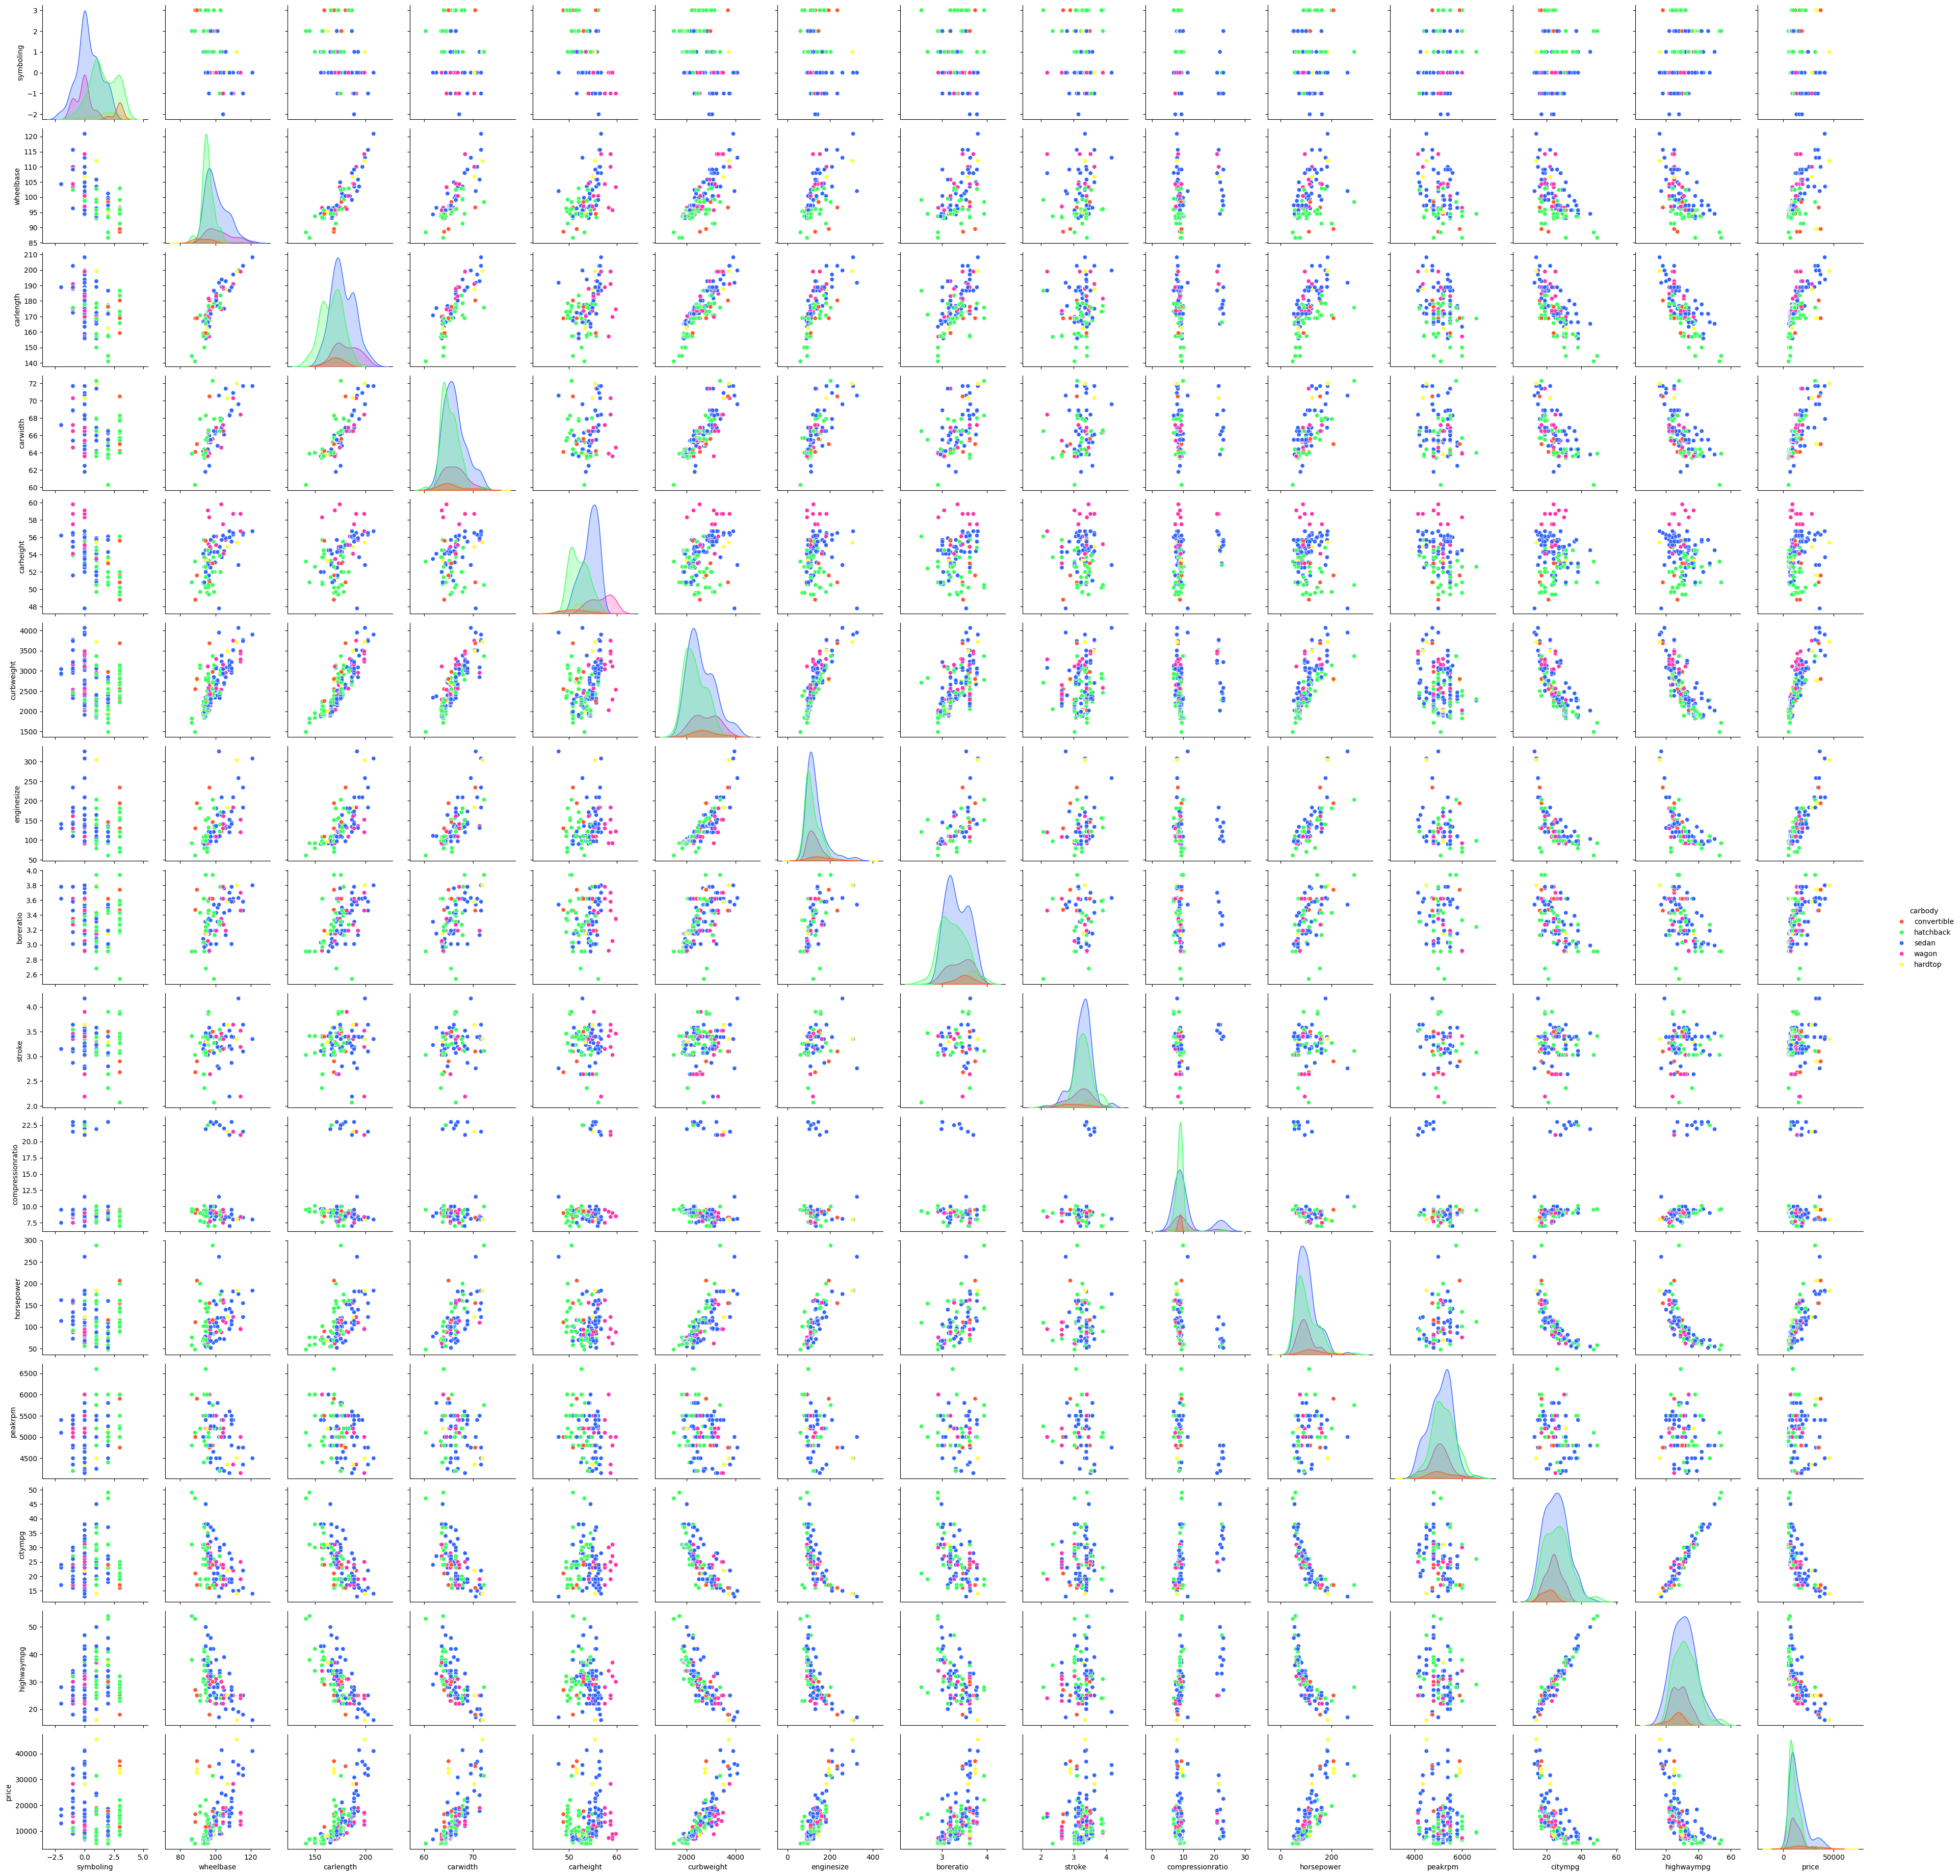

In [18]:

custom_palette = ["#FF5733", "#33FF57", "#3366FF", "#FF33AA", "#FFFF33"]
ax=sns.pairplot(car_data, hue='carbody', palette=custom_palette)


In [19]:
s = (car_data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [20]:

label_data = car_data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0               0       88.6      168.8      64.1  ...         130   
1               0       88.6      168.8      64.1  ...         130   
2               0       94.5      171.2      65.5  ...         152   
3               0       99.8      176.6      66.2  ...         109   
4               0       99.4      176.6      66.4  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 24 columns]

In [21]:
car_data.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

<Axes: >

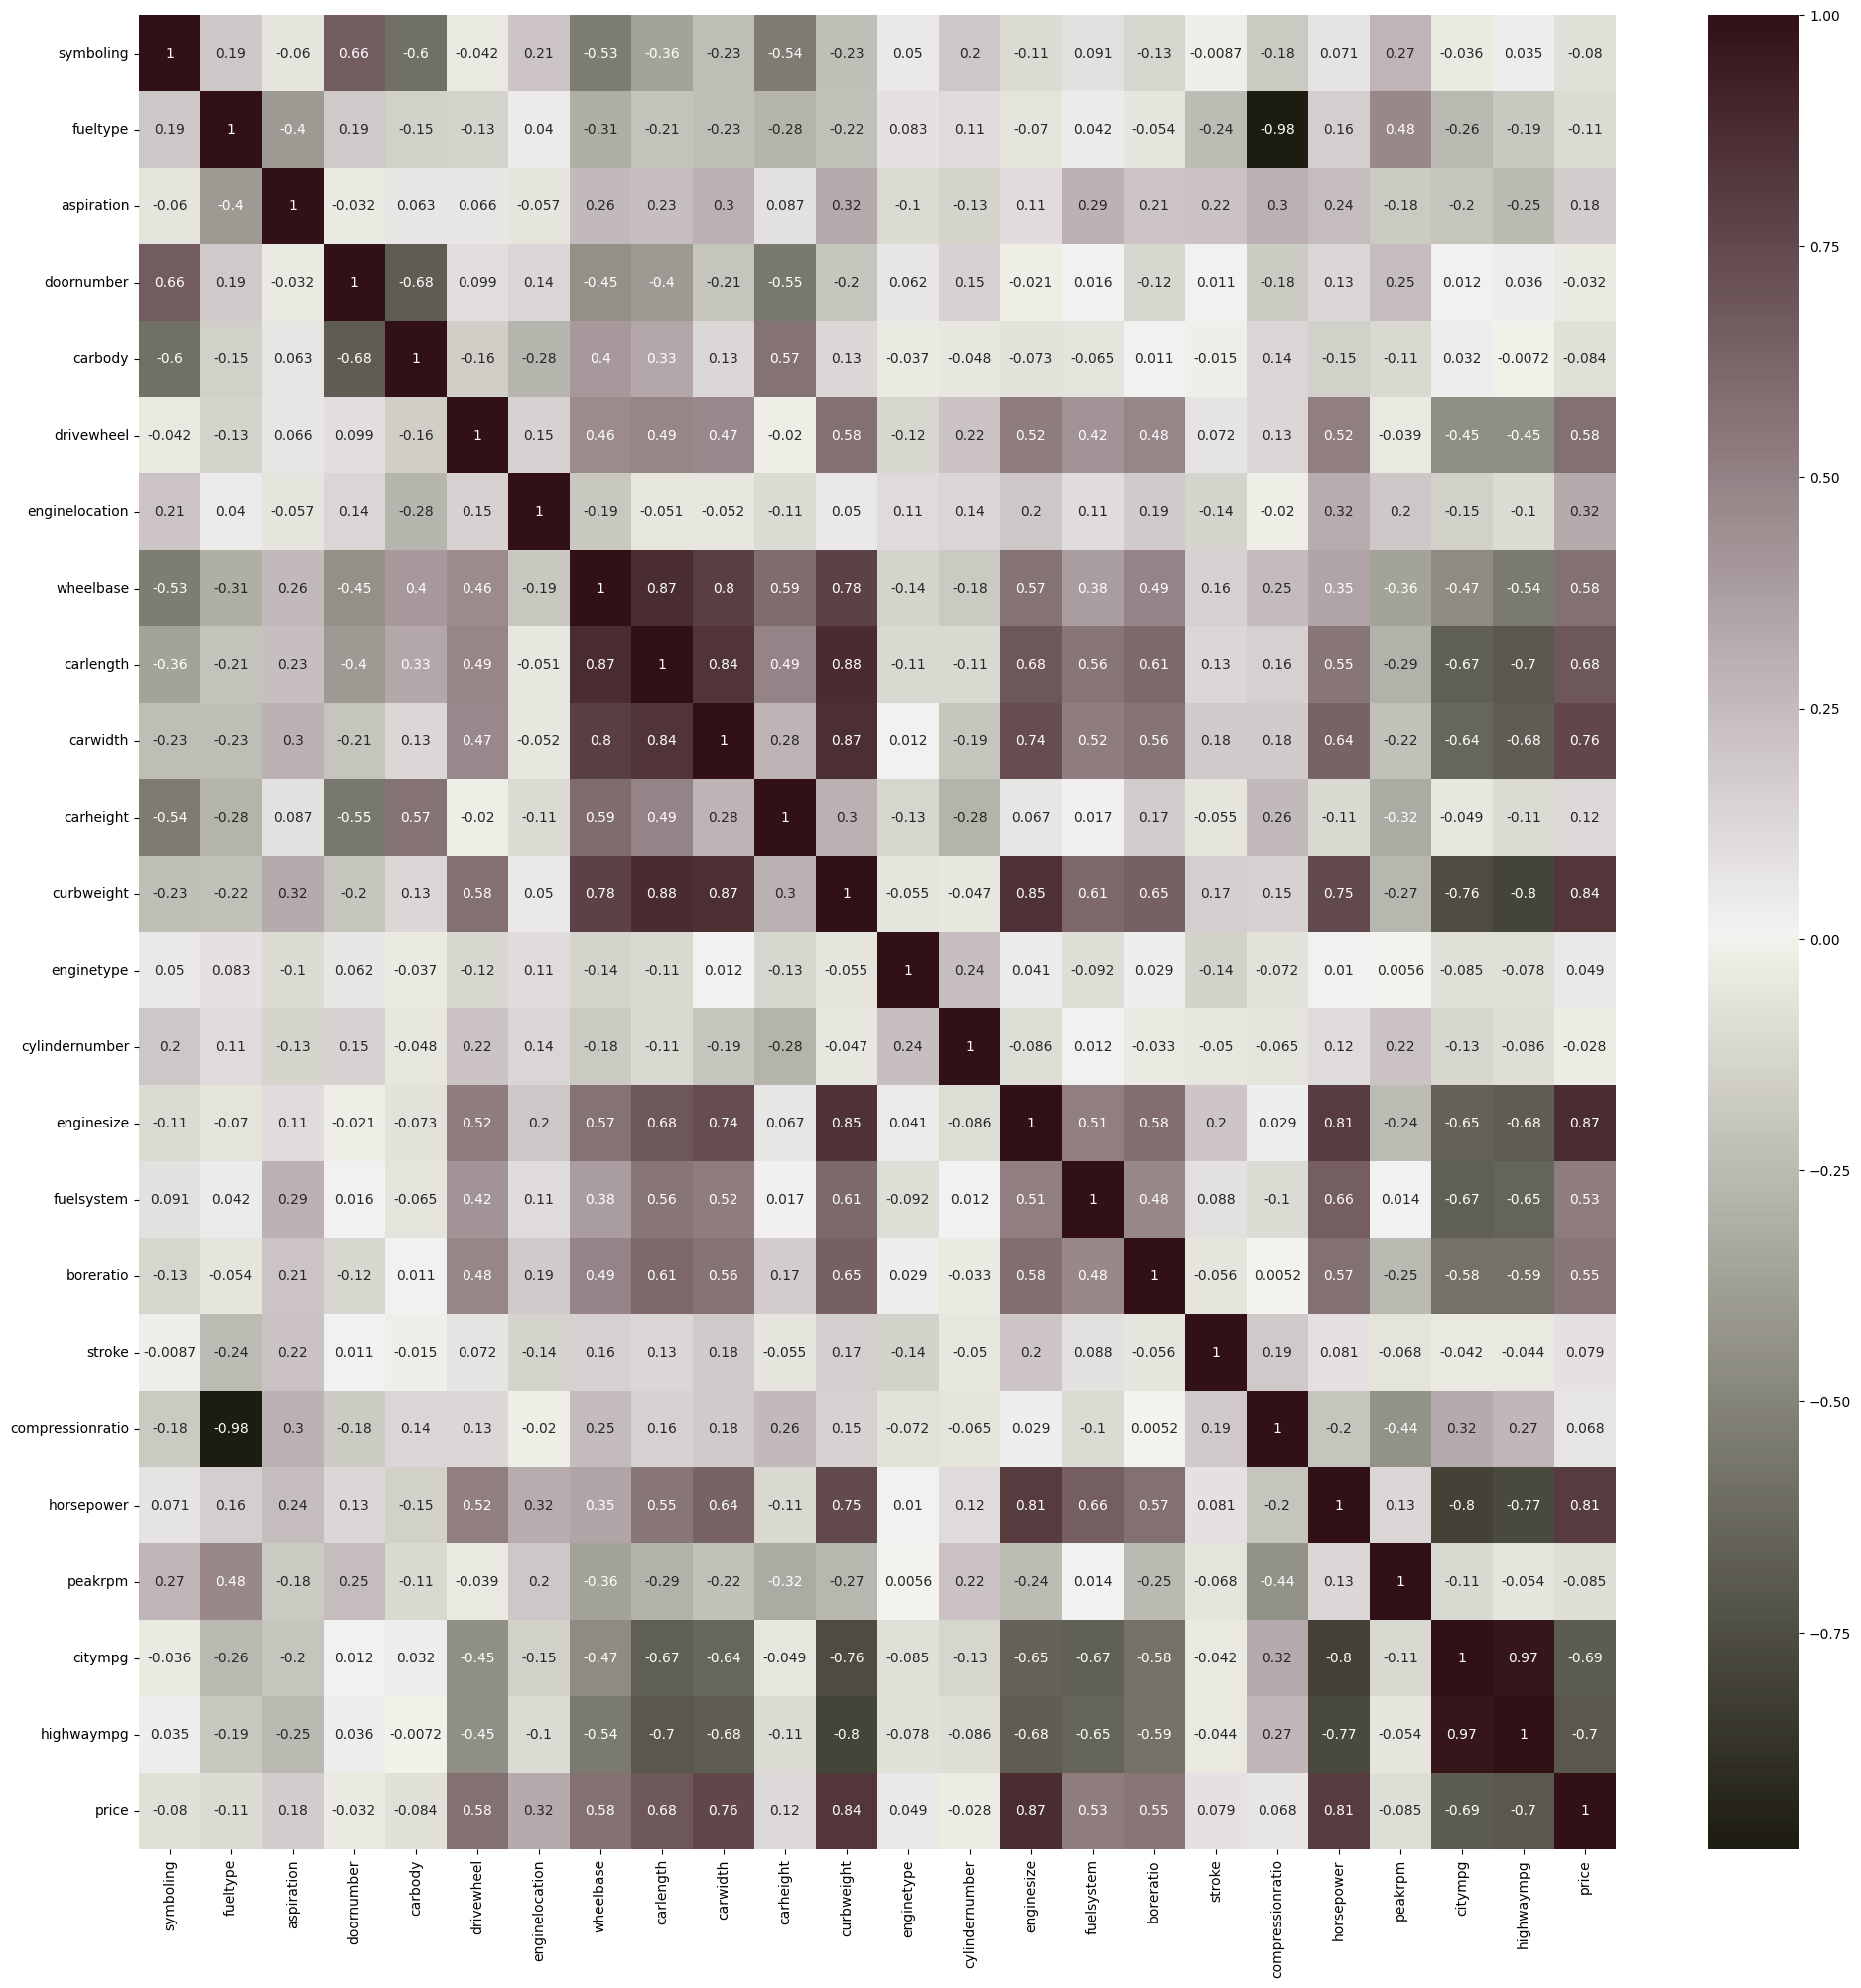

In [ ]:

cmap = sns.diverging_palette(80,5,s=50, l=10, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(24,24))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [22]:
car_data.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [23]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)


In [24]:
imputer = SimpleImputer(strategy='mean')

pipeL_lr = Pipeline([("imputer", imputer),
                        ("scalar1", StandardScaler()),
                        ("lr_classifier", LinearRegression())])

pipeL_dt = Pipeline([("imputer", imputer),
                        ("scalar2", StandardScaler()),
                        ("dt_classifier", DecisionTreeRegressor())])

pipeL_rf = Pipeline([("imputer", imputer),
                        ("scalar3", StandardScaler()),
                        ("rf_classifier", RandomForestRegressor())])

pipeL_kn = Pipeline([("imputer", imputer),
                        ("scalar4", StandardScaler()),
                        ("rf_classifier", KNeighborsRegressor())])


# List of all the pipelines
pipelines = [pipeL_lr, pipeL_dt, pipeL_rf, pipeL_kn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor"}

nan_indices = np.isnan(y_train)

# Remove rows with NaN values from X_train and y_train
X_train_filtered = X_train[~nan_indices]
y_train_filtered = y_train[~nan_indices]

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_filtered, y_train_filtered)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_filtered, y_train_filtered, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -3644.616271 
DecisionTree: -2742.685962 
RandomForest: -2064.165435 
KNeighbors: -3900.365102 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


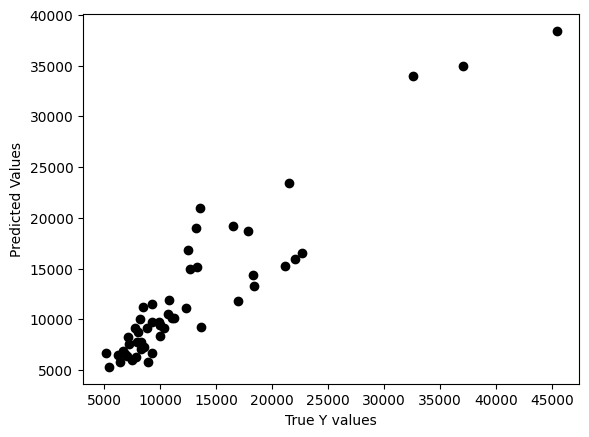

In [26]:

lr = LinearRegression()
lr.fit(X_train_filtered, y_train_filtered)

X_test = np.nan_to_num(X_test)
y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred, c='black')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

def get_metrics(y_test, y_pred2, x_test):
  m1 = metrics.r2_score(y_test, y_pred2)
  m2 = 1 - (1 - metrics.r2_score(y_test, y_pred2)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
  m3 = metrics.mean_absolute_error(y_test, y_pred2)
  m4 = metrics.mean_squared_error(y_test, y_pred2)
  m5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
  return m1, m2, m3, m4, m5

In [ ]:
mtcs = get_metrics(y_test, y_pred, X_test)

print("R^2:", mtcs[0])
print("Adjusted R^2:", mtcs[1])
print("MAE:", mtcs[2])
print("MSE:", mtcs[3])
print("RMSE:", mtcs[4])

R^2: 0.863632805213671
Adjusted R^2: 0.751616895210615
MAE: 2105.9632304304314
MSE: 8383597.788794855
RMSE: 2895.444316300152


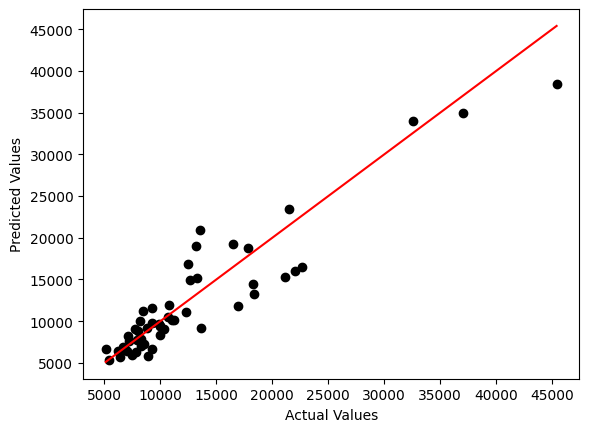

In [ ]:
plt.scatter(y_test, y_pred, c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e+08, tolerance: 9.798e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

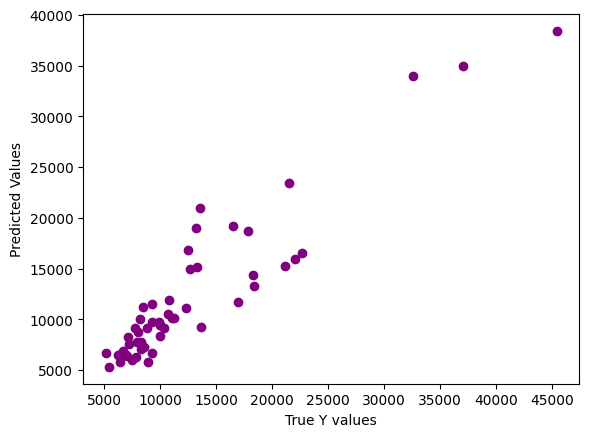

In [ ]:
model = Lasso(alpha=0.1)
model.fit(X_train_filtered, y_train_filtered)

y_pred2 = model.predict(X_test)
plt.scatter(y_test, y_pred2, c='purple')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')



In [ ]:
mtcs = get_metrics(y_test, y_pred2, X_test)

print("R^2:", mtcs[0])
print("Adjusted R^2:", mtcs[1])
print("MAE:", mtcs[2])
print("MSE:", mtcs[3])
print("RMSE:", mtcs[4])


R^2: 0.8637749582088556
Adjusted R^2: 0.7518758167375585
MAE: 2104.2914312636744
MSE: 8374858.490916302
RMSE: 2893.9347765484113


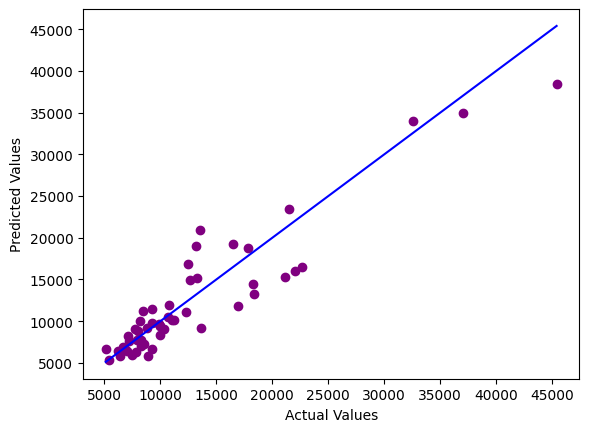

In [ ]:

plt.scatter(y_test, y_pred2, c='purple')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

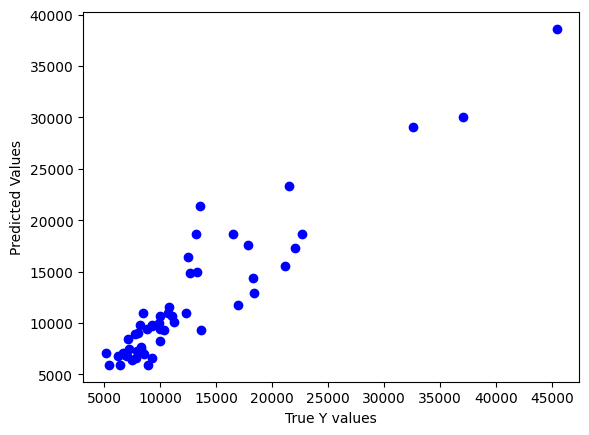

In [ ]:

model = Ridge(alpha=1.0)
model.fit(X_train_filtered, y_train_filtered)

y_pred3 = model.predict(X_test)
plt.scatter(y_test, y_pred3, c='blue')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [ ]:
mtcs = get_metrics(y_test, y_pred2, X_test)

print("R^2:", mtcs[0])
print("Adjusted R^2:", mtcs[1])
print("MAE:", mtcs[2])
print("MSE:", mtcs[3])
print("RMSE:", mtcs[4])

R^2: 0.8637749582088556
Adjusted R^2: 0.7518758167375585
MAE: 2104.2914312636744
MSE: 8374858.490916302
RMSE: 2893.9347765484113


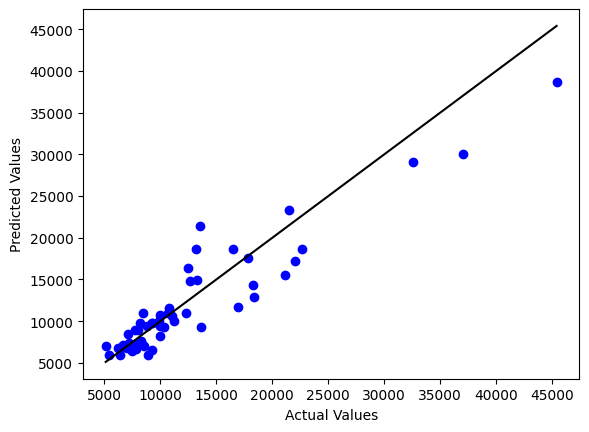

In [ ]:
plt.scatter(y_test, y_pred3, c='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='black')
plt.show()

In [ ]:
mtcs_Table = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R2 Score" : [get_metrics(y_test, y_pred, X_test)[0], get_metrics(y_test, y_pred2, X_test)[0],  get_metrics(y_test, y_pred3, X_test)[0]],
    "Mean Squared Error" : [get_metrics(y_test, y_pred, X_test)[1], get_metrics(y_test, y_pred2, X_test)[1],  get_metrics(y_test, y_pred3, X_test)[1]],
    "Mean Absoulute Error": [get_metrics(y_test, y_pred, X_test)[2], get_metrics(y_test, y_pred2, X_test)[2],  get_metrics(y_test, y_pred3, X_test)[2]],
    "Root Mean Squared Error": [get_metrics(y_test, y_pred, X_test)[3], get_metrics(y_test, y_pred2, X_test)[3],  get_metrics(y_test, y_pred3, X_test)[3]],

})
mtcs_Table

Model  R2 Score  Mean Squared Error  Mean Absoulute Error  \
0  Linear Regression  0.863633            0.751617           2105.963230   
1   Lasso Regression  0.863775            0.751876           2104.291431   
2   Ridge Regression  0.862809            0.750117           2090.807087   

   Root Mean Squared Error  
0             8.383598e+06  
1             8.374858e+06  
2             8.434232e+06